In [2]:
%load_ext autoreload

In [6]:
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import handytools.visualizer as vis
from spectools.stimulus.wyeth import get_stimulus
from spectools.responses import get_response_wrapper, get_drr_wrapper
from spectools.metrics.metrics import responsive
from spectools.models.models import AN_layer, VGG16b_layer, ResNet18_layer

In [2]:
def get_prs(R_fills, R_outlines, hkeys, verbose=False):
    prs = {}
    respdic = {}
    for hkey in hkeys:
        R_fill = R_fills[hkey]
        R_outline = R_outlines[hkey]

        prs[hkey] = np.array([])
        respdic[hkey] = []
        
        for unit in range(R_fill.shape[0]):
            resp = responsive(R_fill[unit]) and responsive(R_outline[unit])
            if resp:
                pr = np.corrcoef(R_fill[unit], R_outline[unit])[0][1]
                prs[hkey] = np.append(prs[hkey], pr)
                respdic[hkey].append(int(unit))
            else:
                prs[hkey] = np.append(prs[hkey], np.nan)
                if verbose: print(f"Layer {hkey}, unit {unit} not responsive!")
    return prs, respdic

# Fill-Outline Invariance (FOI) for different networks

In [4]:
# params
xn = 227
sz = 50
lw = 1.5
fg = 1.0
bg = 0.0

## For AlexNet

In [5]:
# params
hkeys = list(AN_layer.keys())
mtype = "AN"

# fill stimulus
fill = get_stimulus(1, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_fills = get_response_wrapper(hkeys, fill, fname, mtype=mtype)

# outline stimulus
outline = get_stimulus(0, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=0_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_outlines = get_response_wrapper(hkeys, outline, fname, mtype=mtype)

Using AN on cpu.
Using AN on cpu.


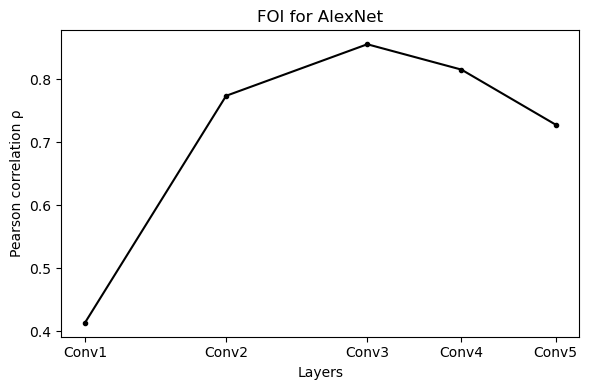

In [6]:
prs_an_foi, resp = get_prs(R_fills, R_outlines, hkeys)
res = [prs_an_foi[hkey][resp[hkey]].mean() for hkey in hkeys]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(hkeys, res, color="k", marker=".", linestyle="-")
ax.set_xticks(hkeys)
ax.set_xticklabels([AN_layer[hkey] for hkey in  hkeys])
ax.set_xlabel("Layers"); ax.set_ylabel("Pearson correlation \u03C1"); ax.set_title("FOI for AlexNet")
plt.tight_layout(); plt.show()

## For VGG16

In [9]:
# params
hkeys = list(VGG16b_layer.keys())
mtype = "VGG16b"

# fill stimulus
fill = get_stimulus(1, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_fills = get_response_wrapper(hkeys, fill, fname, mtype=mtype)

# outline stimulus
outline = get_stimulus(0, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=0_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_outlines = get_response_wrapper(hkeys, outline, fname, mtype=mtype)

Executing the follow missing keys:  []
Executing the follow missing keys:  []


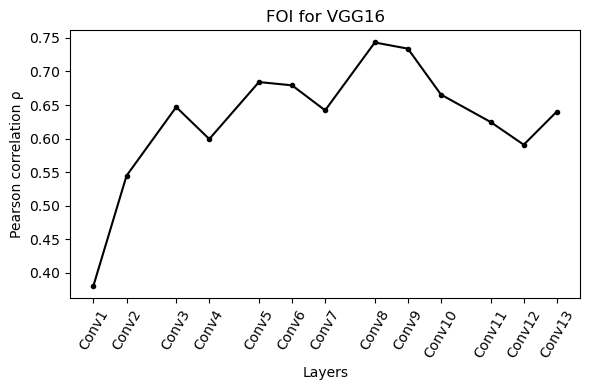

In [11]:
prs_vgg16_foi, resp = get_prs(R_fills, R_outlines, hkeys)
res = [prs_vgg16_foi[hkey][resp[hkey]].mean() for hkey in hkeys]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(hkeys, res, color="k", marker=".", linestyle="-")
ax.set_xticks(hkeys)
ax.set_xticklabels([VGG16b_layer[hkey] for hkey in  hkeys], rotation=60)
ax.set_xlabel("Layers"); ax.set_ylabel("Pearson correlation \u03C1"); ax.set_title("FOI for VGG16")
plt.tight_layout(); plt.show()

## For ResNet18

In [12]:
# params
hkeys = list(ResNet18_layer.keys())
mtype = "ResNet18"

# fill stimulus
fill = get_stimulus(1, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_fills = get_response_wrapper(hkeys, fill, fname, mtype=mtype)

# outline stimulus
outline = get_stimulus(0, xn=xn, sz=sz, lw=lw, fg=fg, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=0_xn={xn}_sz={sz}_lw={lw}_fg={fg}_bg={bg}.npy"
R_outlines = get_response_wrapper(hkeys, outline, fname, mtype=mtype)

Executing the follow missing keys:  []
Executing the follow missing keys:  []


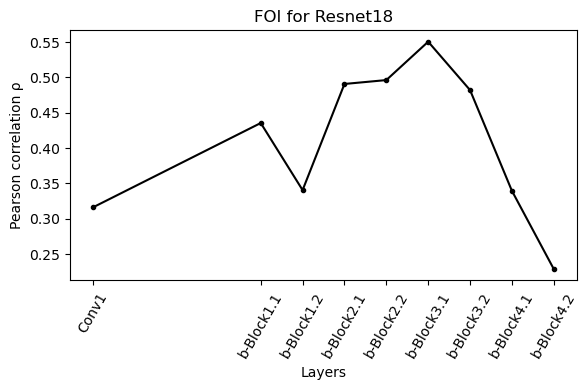

In [14]:
prs_resnet18_foi, resp = get_prs(R_fills, R_outlines, hkeys)
res = [prs_resnet18_foi[hkey][resp[hkey]].mean() for hkey in hkeys]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(hkeys, res, color="k", marker=".", linestyle="-")
ax.set_xticks(hkeys)
ax.set_xticklabels([ResNet18_layer[hkey] for hkey in  hkeys], rotation=60)
ax.set_xlabel("Layers"); ax.set_ylabel("Pearson correlation \u03C1"); ax.set_title("FOI for Resnet18")
plt.tight_layout(); plt.show()

# On-Off Invariance (OOI) for different networks

In [15]:
# params
xn = 227
sz = 50
lw = 1.5
bg = 0.0
fillflag = 1

verbose = False

## For AlexNet

In [12]:
# params
hkeys = list(AN_layer.keys())
mtype = "AN"

# fill stimulus
onstim = get_stimulus(fillflag, xn=xn, sz=sz, lw=lw, fg=1.0, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg=1.0_bg={bg}.npy"
R_ons = get_response_wrapper(hkeys, onstim, fname, mtype=mtype)

# outline stimulus
offstim = get_stimulus(fillflag, xn=xn, sz=sz, lw=lw, fg=-1.0, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg=-1.0_bg={bg}.npy"
R_offs = get_response_wrapper(hkeys, offstim, fname, mtype=mtype)

Using AN on cpu.
Using AN on cpu.


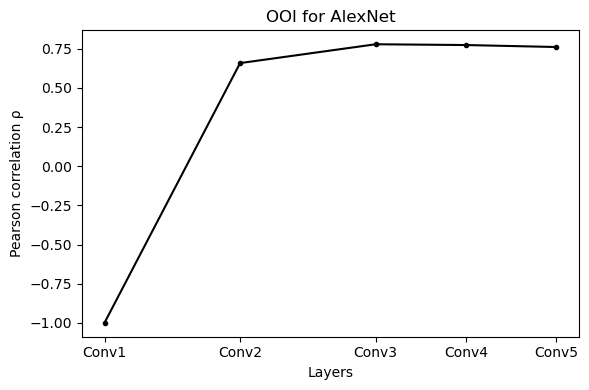

In [13]:
prs_an_ooi, resp = get_prs(R_ons, R_offs, hkeys)
res = [prs_an_ooi[hkey][resp[hkey]].mean() for hkey in hkeys]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(hkeys, res, color="k", marker=".", linestyle="-")
ax.set_xticks(hkeys)
ax.set_xticklabels([AN_layer[hkey] for hkey in  hkeys])
ax.set_xlabel("Layers"); ax.set_ylabel("Pearson correlation \u03C1"); ax.set_title("OOI for AlexNet")
plt.tight_layout(); plt.show()

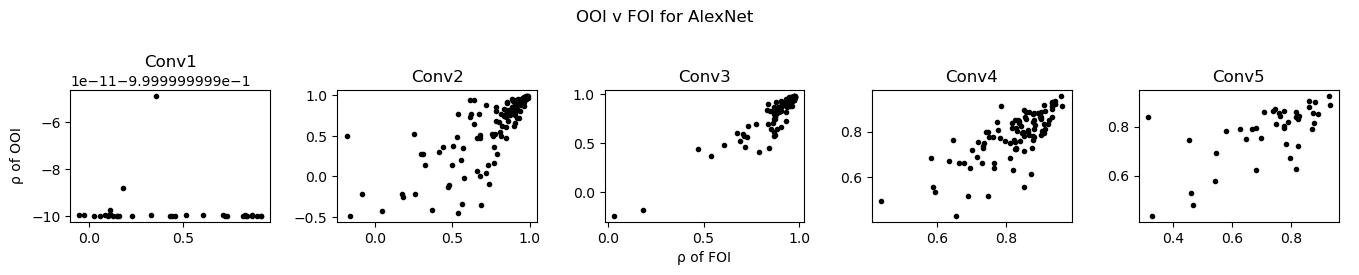

In [14]:
fig = plt.figure(figsize=(len(hkeys)*3 - 1, 3))
for i in range(len(hkeys)):
    hkey = hkeys[i]
    ax = fig.add_subplot(1, len(hkeys), i+1)
    ax.plot(prs_an_foi[hkey][resp[hkey]], prs_an_ooi[hkey][resp[hkey]], "k.")
    ax.set_title(AN_layer[hkey])
vis.common_label(fig, "\u03C1 of FOI", "\u03C1 of OOI")
plt.suptitle("OOI v FOI for AlexNet")
plt.tight_layout(); plt.show()

## For VGG16

In [16]:
# params
hkeys = list(VGG16b_layer.keys())
mtype = "VGG16b"

# fill stimulus
onstim = get_stimulus(fillflag, xn=xn, sz=sz, lw=lw, fg=1.0, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg=1.0_bg={bg}.npy"
R_ons = get_response_wrapper(hkeys, onstim, fname, mtype=mtype)

# outline stimulus
offstim = get_stimulus(fillflag, xn=xn, sz=sz, lw=lw, fg=-1.0, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg=-1.0_bg={bg}.npy"
R_offs = get_response_wrapper(hkeys, offstim, fname, mtype=mtype)

Executing the follow missing keys:  []
Executing the follow missing keys:  [0, 2, 5, 7, 10, 12, 14, 17, 19, 21, 24, 26, 28]
Using VGG16b on cpu.


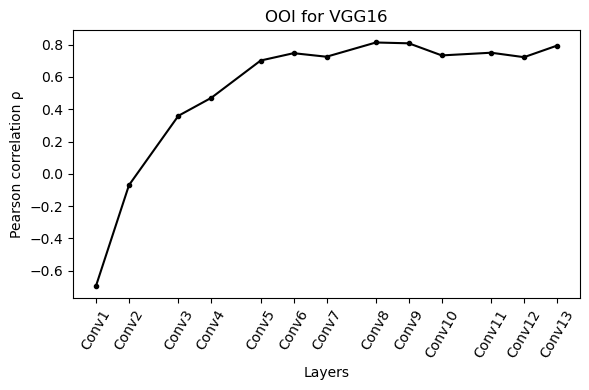

In [18]:
prs_vgg16_ooi, resp = get_prs(R_ons, R_offs, hkeys)
res = [prs_vgg16_ooi[hkey][resp[hkey]].mean() for hkey in hkeys]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(hkeys, res, color="k", marker=".", linestyle="-")
ax.set_xticks(hkeys)
ax.set_xticklabels([VGG16b_layer[hkey] for hkey in  hkeys], rotation=60)
ax.set_xlabel("Layers"); ax.set_ylabel("Pearson correlation \u03C1"); ax.set_title("OOI for VGG16")
plt.tight_layout(); plt.show()

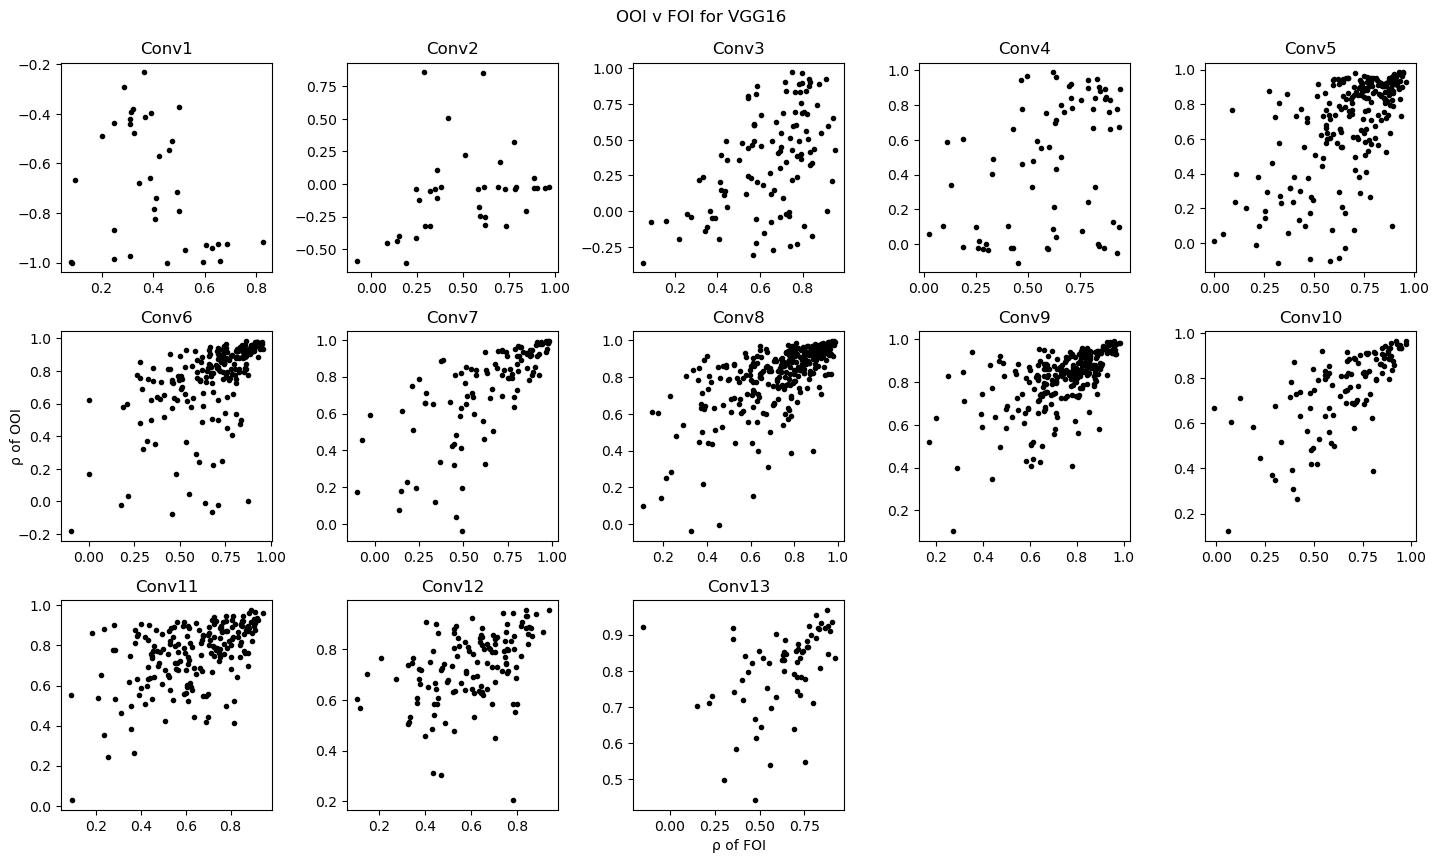

In [21]:
fig = plt.figure(figsize=(5*3, 3*3))
for i in range(len(hkeys)):
    hkey = hkeys[i]
    ax = fig.add_subplot(3, 5, i+1)
    ax.plot(prs_vgg16_foi[hkey], prs_vgg16_ooi[hkey], "k.")
    ax.set_title(VGG16b_layer[hkey])
vis.common_label(fig, "\u03C1 of FOI", "\u03C1 of OOI")
plt.suptitle("OOI v FOI for VGG16")
plt.tight_layout(); plt.show()

## For ResNet18

In [18]:
# params
hkeys = list(ResNet18_layer.keys())
mtype = "ResNet18"

# fill stimulus
onstim = get_stimulus(fillflag, xn=xn, sz=sz, lw=lw, fg=1.0, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg=1.0_bg={bg}.npy"
R_ons = get_response_wrapper(hkeys, onstim, fname, mtype=mtype)

# outline stimulus
offstim = get_stimulus(fillflag, xn=xn, sz=sz, lw=lw, fg=-1.0, bg=bg)
fname = lambda hkey: f"hkey={hkey}_fill=1_xn={xn}_sz={sz}_lw={lw}_fg=-1.0_bg={bg}.npy"
R_offs = get_response_wrapper(hkeys, offstim, fname, mtype=mtype)

Using ResNet18 on cpu.
Using ResNet18 on cpu.


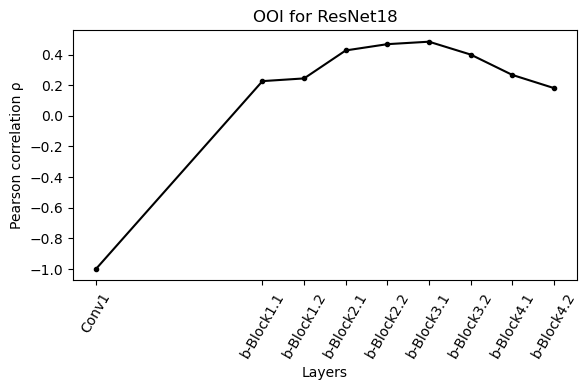

In [19]:
prs_resnet18_ooi, resp = get_prs(R_ons, R_offs, hkeys)
res = [prs_resnet18_ooi[hkey][resp[hkey]].mean() for hkey in hkeys]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(hkeys, res, color="k", marker=".", linestyle="-")
ax.set_xticks(hkeys)
ax.set_xticklabels([ResNet18_layer[hkey] for hkey in  hkeys], rotation=60)
ax.set_xlabel("Layers"); ax.set_ylabel("Pearson correlation \u03C1"); ax.set_title("OOI for ResNet18")
plt.tight_layout(); plt.show()

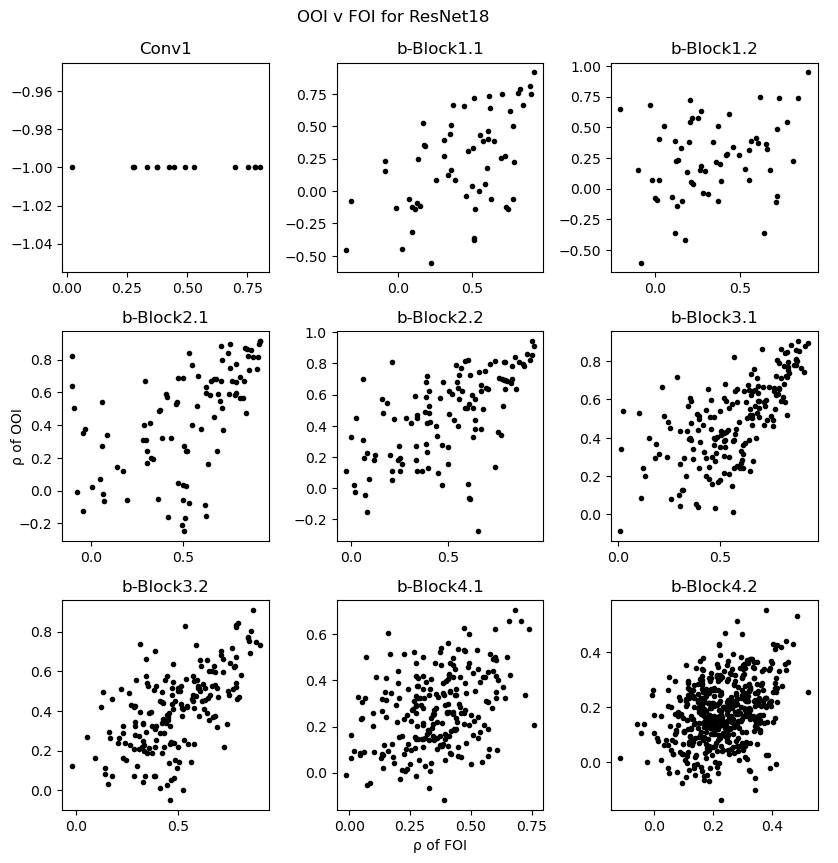

In [20]:
fig = plt.figure(figsize=(3*3, 3*3))
for i in range(len(hkeys)):
    hkey = hkeys[i]
    ax = fig.add_subplot(3, 3, i+1)
    ax.plot(prs_resnet18_foi[hkey], prs_resnet18_ooi[hkey], "k.")
    ax.set_title(ResNet18_layer[hkey])
vis.common_label(fig, "\u03C1 of FOI", "\u03C1 of OOI")
plt.suptitle("OOI v FOI for ResNet18")
plt.tight_layout(); plt.show()

# FOI v Receptive Field for different networks

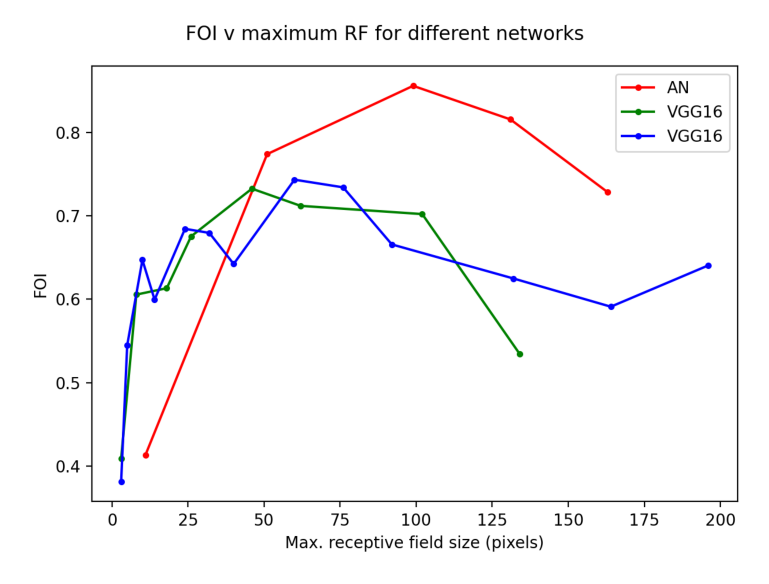

In [12]:
image_path = "/home2/belleliu/artiphisiology/graphs/FOI_v_maxRF.png" # this is plotted using code elsewhere
image = mpimg.imread(image_path)
fig = plt.figure(dpi=150)
plt.imshow(image)
plt.axis('off')
plt.show()

# Dynamic Range Metric (DRI) for different networks (Unfinished)

In [7]:
# params
hkeys = list(AN_layer.keys())
mtype = "AN"

fname = lambda hkey: f"imgnettecr_hkey={hkey}.npy"
R_an_drm = get_drr_wrapper(hkeys, fname, mtype=mtype)

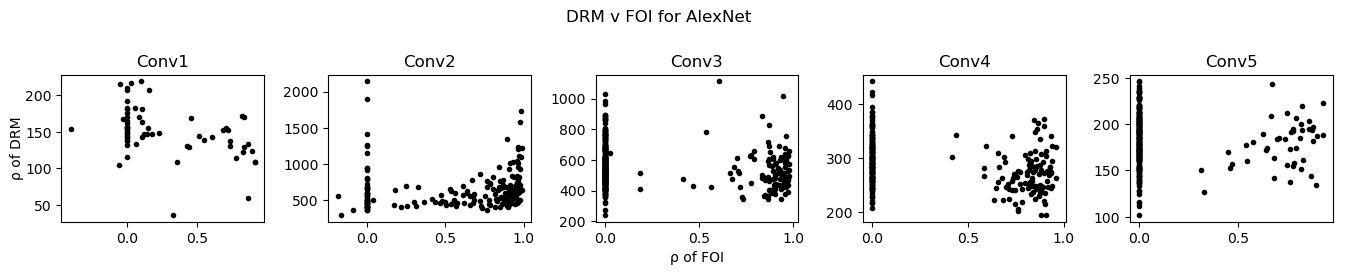

In [8]:
prs_an_drm = {}
for hkey in hkeys:
    prs_an_drm[hkey] = R_an_drm[hkey].std(axis=1) #/ np.absolute(R_an_drm[hkey].mean(axis=1))

fig = plt.figure(figsize=(len(hkeys)*3 - 1, 3))
for i in range(len(hkeys)):
    hkey = hkeys[i]
    ax = fig.add_subplot(1, len(hkeys), i+1)
    ax.plot(prs_an_foi[hkey], prs_an_drm[hkey], "k.")
    ax.set_title(AN_layer[hkey])
vis.common_label(fig, "\u03C1 of FOI", "\u03C1 of DRM")
plt.suptitle("DRM v FOI for AlexNet")
plt.tight_layout(); plt.show()